**Group 3 Member  :**
* Eka Evita A.
* Faricha Aulia
* M. Aristya P.
* Septian Fahmi A.
* M. Asad

In [ ]:
# import library
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

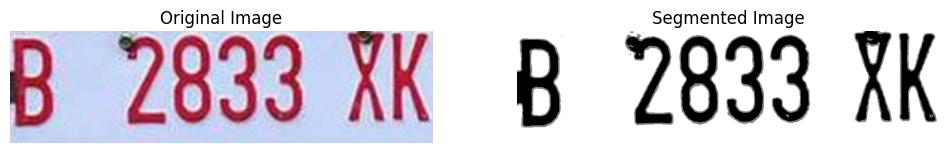

In [ ]:
# Load the license plate image
image_path = '/content/B2833XK_png.rf.31ea229a61bc8ed55b3115a82ae912e7.jpg'
original_image = cv2.imread(image_path)

# Convert the image to grayscale (you can choose a different color space if needed)
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Apply K-Means clustering to segment the license plate
# You can adjust the number of clusters (K) based on your specific image
K = 3  # Number of clusters
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
_, labels, centers = cv2.kmeans(gray_image.reshape(-1, 1).astype(np.float32), K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
segmented_image = centers[labels.flatten()].reshape(gray_image.shape)

# Display the original and segmented images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image, cmap='gray')
plt.title("Segmented Image")
plt.axis('off')

plt.show()

In [ ]:
from skimage.metrics import structural_similarity as ssim
from sklearn.metrics import mean_squared_error

# Load the original license plate image (in grayscale)
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Convert the segmented image to grayscale
segmented_image_gray = segmented_image.astype(np.uint8)

# Ensure both images have the same dimensions
if original_image.shape != segmented_image_gray.shape:
    segmented_image_gray = cv2.resize(segmented_image_gray, (original_image.shape[1], original_image.shape[0]))

# Calculate SSIM
ssim_score = ssim(original_image, segmented_image_gray)

# Calculate MSE
mse = mean_squared_error(original_image, segmented_image_gray)

print(f"SSIM: {ssim_score:.2f}")
print(f"MSE: {mse:.2f}")

SSIM: 0.82
MSE: 43.62


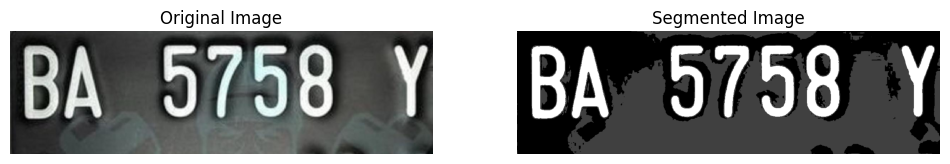

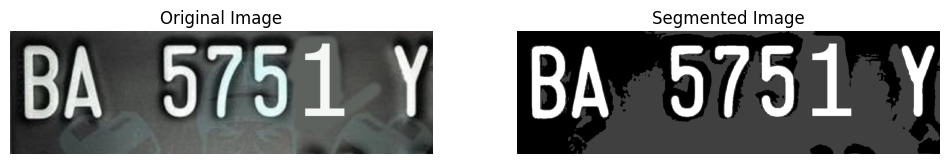

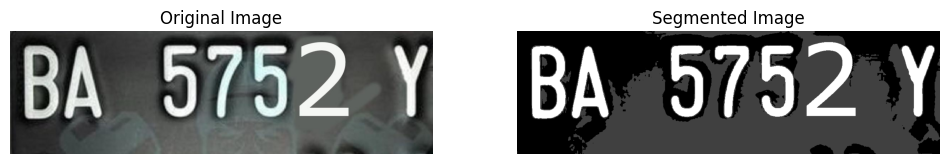

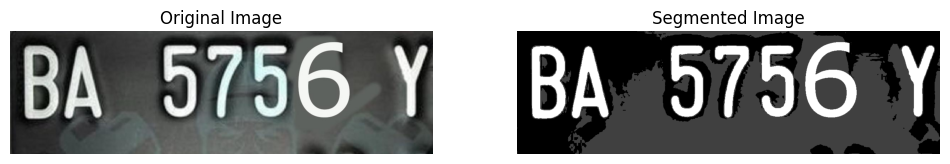

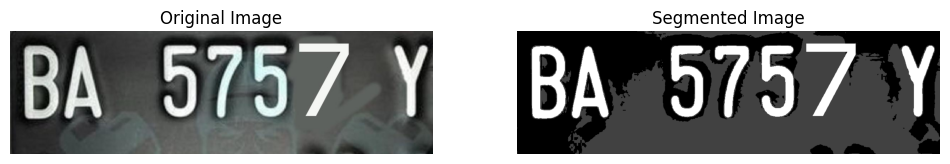

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Define a list of image file paths
image_paths = [
    '/content/BA5758Y_png.rf.d598c9b574971572f931ae8eb75564ed.jpg',
    '/content/BA5751Y_png.rf.f8c4c1738e1d2b5ed1c63f713adebedd.jpg',
    '/content/BA5752Y_png.rf.dfa11688aa62c71d3d1fd87c3b5eae1e.jpg',
    '/content/BA5756Y_png.rf.1a29f4624b29315d05239c45069a68d6.jpg',
    '/content/BA5757Y_png.rf.e4e7557f9e1bff8c2d6d1b986714f6ea.jpg'
]

# Define the number of clusters (K)
K = 3  # Number of clusters

for image_path in image_paths:
    # Load the license plate image
    original_image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

    # Apply K-Means clustering to segment the license plate
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, centers = cv2.kmeans(gray_image.reshape(-1, 1).astype(np.float32), K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    segmented_image = centers[labels.flatten()].reshape(gray_image.shape)

    # Display the original and segmented images
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(segmented_image, cmap='gray')
    plt.title("Segmented Image")
    plt.axis('off')

    plt.show()